# 1. Systems of Linear Equations 

This section introduces systems of linear equations, or linear systems, and discusses how to find their solutions.

## Linear Systems

A _linear equation_ in $n$ variables is an equation of the form:

$$
a_1 x_1 + a_2 x_2 + \dots + a_n x_n = b
$$

where $x_1, x_2, \dots, x_n$ are variables, and $b$ and the coefficients $a_1, a_2, \dots, a_n$ are real numbers. A _system of linear equations_ is a collection of linear equations in the same set of variables. For example, a system of $m$ equations in $n$ variables $x_1, x_2, \dots, x_n$ can be represented as:

\begin{align}
a_{11} x_1 + a_{12} x_2 + \dots + a_{1n} x_n &= b_1 \\
a_{21} x_1 + a_{22} x_2 + \dots + a_{2n} x_n &= b_2 \\
&\vdots \\
a_{n1} x_1 + a_{n2} x_2 + \dots + a_{nn} x_n &= b_n \\
\end{align}

A _solution_ for a linear system is a list of real numbers $(s_1, s_2, \dots, s_n)$ that satisfy each equation in the system. Two linear systems are said to be equivalent if they have the same set of solutions. In other words, every solution of the first system is also a solution of the second system, and vice versa. Furthermore, a linear system is called __consistent__ if it has solutions; otherwise, it is called __inconsistent__. It turns out that any linear system has either no solutions, exactly one solution, or infinitely many solutions.

As an example, let's consider a simple case where we have two equations in two unknowns. Finding the solution of such a system is easy as it comes down to finding the intersection of two lines in the plane. More precisely, the graph of each equation in this system represents a line, and a point $(s_1, s_2) \in \mathbb{R}^2$ is a solution if and only if it lies on both lines.

__Example 1:__ 
The following system is consistent, and its only solution is $(0, -1)$.

$$
\begin{align*}
2x_1 - x_2 &= 1 \\
x_1 - 2x_2 &= 2 \\
\end{align*}
$$
The following cell plots the graph of these lines on the same plane:

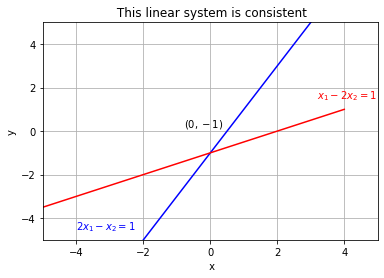

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ (k-2)/2 for k in x]

fig, ax = plt.subplots()

# Specify the length of each axis
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

#Plot x and y1 using blue color
ax.plot(x, y1, color = 'b')
ax.text(-4,-4.5,'$2x_1 - x_2 = 1$', color = 'b')

#Plot x and y2 using red color
ax.plot(x, y2, color = 'r')
ax.text(3.2,1.5,'$x_1 -2x_2 = 1$', color = 'r')

# add label to the intersection
ax.text(-0.8, 0.2, '$(0,-1) $' )

# Add labels and a title to the graph
ax.set(xlabel=' x', ylabel='y',
       title=' This linear system is consistent')
ax.grid()

plt.show()

(2) The next system is inconsistent because it does not have any solutions.

\begin{align*}
    2x_1 - x_2 &= 1 \\ 
    4x_1 - 2x_2 &= 7 \\ 
\end{align*}

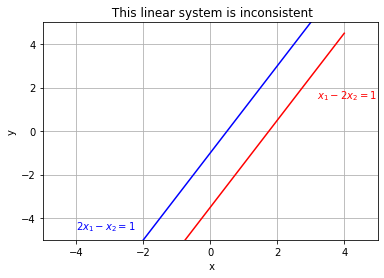

In [1]:
import matplotlib.pyplot as plt

# Data for plotting

x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ 2*k-7/2 for k in x]

fig, ax = plt.subplots()

# Specify the length of each axis
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

#Plot x and y1 using blue color
ax.plot(x, y1, color = 'b')
ax.text(-4,-4.5,'$2x_1 - x_2 = 1$', color = 'b')

#Plot x and y2 using red color
ax.plot(x, y2, color = 'r')
ax.text(3.2,1.5,'$x_1 -2x_2 = 1$', color = 'r')



# Add labels and a title to the graph
ax.set(xlabel=' x', ylabel='y',
       title=' This linear system is inconsistent')
ax.grid()

plt.show()

Similarly, we can find a linear system containing two equations in two unknowns that has infinitely many solutions ( see Excercies 1).

## Solving a Linear System

A fundamental question about a linear system is whether or not it is consistent and, if it is, whether it has a unique solution or infinitely many solutions. To that end, we utilize the __row reduction algorithm__. The main idea is to use a set of operations called _elementary row operations_ to convert a system into an equivalent system that is easier to solve. These elementary row operations are:

1. Swapping two equations.
2. Multiplying an equation by a nonzero number.
3. Adding a multiple of one equation to another equation.

To do this, we first represent the essential information of a system in a compact rectangular form called the augmented matrix of the system. For example, the augmented matrix of the system:

$$
\begin{align*}
x + 2y + 3z &= 9 \\
2x - y + z &= 8 \\
3x - z &= 3 
\end{align*}
$$

is the following matrix:
$$
\begin{bmatrix} 1 & 2 & 3 & 9 \\ 2 & -1 & 1 & 8 \\ 3 & 0 & -1 & 3 \end{bmatrix}
$$

In the augmented matrix, each row represents an equation in the system. We can define the same operations for matrices, by simply replacing "equation" with "row" in their definitions. Moreover, we say that two matrices A and B are __row equivalent__ if one can be transformed into the other using the elementary row operations mentioned above.

The goal is to convert the augmented matrix to another matrix form that is easier to solve. This easier form is called __echelon form__. This new matrix form corresponds to a linear system that is simpler to deal with and is equivalent to the original system.

To formally define the echelon form, we need to introduce the following concepts:

__Zero Row__: a row containing only zero entries.

__Leading Entry__: the leftmost nonzero entry in a nonzero row.

A rectangular matrix is in row echelon form (REF) if:

1. All non-zero rows are above any zero row.
2. Every leading term of a row is in a column to the right of the leading entry.
3. Entries below a leading entry are zero.

A rectangular matrix is in __reduced row echelon form__ (RREF) if:

1. It is in echelon form.
2. Every leading entry is 1.
3. Entries above a leading entry are zero.


__Example 2:__

The following matrix is in REF. The leading entries ($\blacksquare$) can be any nonzero real numbers, while the ($*$s) may be any real number.

$$\begin{bmatrix} 0 & \blacksquare & * & * & * & * & & * \\ 0 & 0 & \blacksquare & * & * & * & & * \\ 0 & 0 & 0 & 0 & \blacksquare & * && *\\  0 & 0 & 0 & 0 & 0 & \blacksquare & & * \\0 & 0 & 0 & 0 & 0 &  0 & & \blacksquare\end{bmatrix}$$

The following matrix is in RREF:

$$\begin{bmatrix} 0 & 1 & 0 & * & 0 & & * \\ 0 & 0 & 1 & * & 0 & & * \\ 0 & 0 & 0 & 0 & 1 & & *\\ 0 & 0 & 0 & 0 & 0 & & 0\end{bmatrix}$$

__Theorem 1:__
Any nonzero matrix is row equivalent to one and only one matrix in RREF.

Since the reduced echelon form is unique, the leading entries are always in the same positions in any echelon form. These locations are called __pivot positions__, and a column with a pivot position is called a __pivot column__. Note that the leading entries in REF correspond to leading 1s in RREF. In the above example, the squares ($\blacksquare$) identify the pivot positions.



__Reduction Algorithm:__

The reduction algorithm takes in a matrix and produces a matrix in RREF. It consists of 5 steps; in step four, it produces a matrix in REF, and in the fifth step, RREF. We will show the algorithm with an example:

__Example 3:__ Find the RREF of

$A = \begin{bmatrix} 0 & 2 & 3 & & 9\\ 2 & -1 & 1 & & 8 \\ 3 & 0 & -1 & & 3\end{bmatrix}$

__Solution:__

We represent a matrix as a numpy array

In [3]:
import numpy as np

#numpy array to represent a matrix: each row is a list.
A = np.array([[0,2,3,9],[2,-1,1,8],[3,0,-1,3]])
A

array([[ 0,  2,  3,  9],
       [ 2, -1,  1,  8],
       [ 3,  0, -1,  3]])

Lets write a Python function that perform the row operations:

In [4]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix = np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing row 1 by the sum of itself and a multiple of row2 

def replace(matrix, row1, row2, scalar):
    copy_matrix = np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1] + scalar * matrix[row2] 
    return copy_matrix

__Step 1__: Start with the leftmost nonzero entry in the first column and bring it to the top row. This is a pivot column, and the pivot position should be on top.

In [5]:
#the leftmost nonzero column:
A[:,0]

array([0, 2, 3])

__Step 2__: Select a nonzero entry in the pivot column as a pivot. If necessary swap the rows to move this entrty to the top. 

In [6]:
#The first nonzero element is at row 2. Swap the rows 1 and 2:
A1 = swap(A, 0, 1)
A1

array([[ 2., -1.,  1.,  8.],
       [ 0.,  2.,  3.,  9.],
       [ 3.,  0., -1.,  3.]])

__Step 3__: Use scaling operation to make the pivot 1, and replacement operation to create zeros below the leading 1:

In [7]:
#Divide row1 by 2 
A2 = scale(A_1, 0, 1/2)
A2

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  2. ,  3. ,  9. ],
       [ 3. ,  0. , -1. ,  3. ]])

In [8]:
#Replace row3  by row3-3*row1

A3 = replace(A_2,2,0,-3)
A3

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  2. ,  3. ,  9. ],
       [ 0. ,  1.5, -2.5, -9. ]])

__Step 4:__ Ignore the row with a pivot position and cover all rows, if any, above it. For the remaining matrix, apply steps 1-3. Repeat the process until there are no more non-zero rows to modify.

In [9]:
#Divide row2 by 2 
A4 = scale(A_3, 1, 1/2)
A4

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  1. ,  1.5,  4.5],
       [ 0. ,  1.5, -2.5, -9. ]])

In [10]:
#Replace row3  by row3-3*row1

A5 = replace(A_4, 2, 1, -1.5)
A5

array([[  1.  ,  -0.5 ,   0.5 ,   4.  ],
       [  0.  ,   1.  ,   1.5 ,   4.5 ],
       [  0.  ,   0.  ,  -4.75, -15.75]])

We apply the fifth step to get the RREF:

__Step 5__: If a pivot is not one, we use the scaling operation to make it one. Moreover, we create zeros above each pivot starting with the rightmost pivot and working upward and to the left.


In [11]:
#make all entries in pivot positions 1
A6 = scale(A_5,2, 1/-4.75)
A6

array([[ 1.        , -0.5       ,  0.5       ,  4.        ],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [12]:
#replace row1 by row1 + 0.5* row 2
A7 = replace(A_6, 0, 1, 0.5)
A7

array([[ 1.        ,  0.        ,  1.25      ,  6.25      ],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [13]:
#replace row1 by row1 - 1.25* row 2
A8 = replace(A_7, 0, 2, -1.25)
A8

array([[ 1.        ,  0.        ,  0.        ,  2.10526316],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [14]:
#replace row2 by row2 - 1.5* row 3
A9 = replace(A_8,1,2,-1.5)
A9

array([[ 1.        ,  0.        ,  0.        ,  2.10526316],
       [ 0.        ,  1.        ,  0.        , -0.47368421],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

$A_9$ is the RREF of $A$, and the augmented column (the rightmost column) of $A_9$ is the solution to the original system.

__Example 2__

Find the solution set of the following system of equations:

$$
\begin{align*}
2x -5y +z &= 2 \\
x -y &= 4 \\
3x-z &= 3 
\end{align*} 
$$


__Solution__: Let's setup the augmented matrix of the system and then convert it to its RREF:

In [19]:
#The augmented matrix
R = np.array([[2,-5, 1, 2], [1,-1,0,4], [3,0,-1,3]])
R

array([[ 2, -5,  1,  2],
       [ 1, -1,  0,  4],
       [ 3,  0, -1,  3]])

In [20]:
#finding the first pivot entry: 1
R1= swap(R, 1, 0)
R1

array([[ 1., -1.,  0.,  4.],
       [ 2., -5.,  1.,  2.],
       [ 3.,  0., -1.,  3.]])

In [21]:
#making entries below 1 zero
R2 = replace(R1, 1, 0, -2)
R2

array([[ 1., -1.,  0.,  4.],
       [ 0., -3.,  1., -6.],
       [ 3.,  0., -1.,  3.]])

In [22]:
R3 = replace(R2, 2,0, -3)
R3

array([[ 1., -1.,  0.,  4.],
       [ 0., -3.,  1., -6.],
       [ 0.,  3., -1., -9.]])

In [23]:
#making entries below the second pivot entry (-3) zero
R4 = replace(R3, 2, 1, 1)
R4

array([[  1.,  -1.,   0.,   4.],
       [  0.,  -3.,   1.,  -6.],
       [  0.,   0.,   0., -15.]])

R4 is in REF. Now we write back the corresponding linear system:

$$
\begin{align*}
x + y &= 4 \\
-3y + z &= -6 \\
0 &= -15 
\end{align*} 
$$

The last equation is impossible, which means the system is inconsistent.


## Exercises


1. Find a linear system containing two equations in two unknowns that has infinitely many solutions. Verify your answer by plotting the lines of these equations on the same plane.



2. Find a linear system that is equivalent to the linear system in Example 1.


3. Determine which of the following matrices are in REF. For those that are, identify their pivot columns. Are any in RREF?


$A = \begin{bmatrix} 0 & 0 & 4 &-1 && 0\\ 0 & 0 & 0 &0 && 0 \\ 0 & 0& 0 & 0 &&3\end{bmatrix}$


$B = \begin{bmatrix} 1 & 1 & 0 && 1\\  0 & 1 & 1 &&0\\ 0 & 0 & 1 &&1 \end{bmatrix}$

$C = \begin{bmatrix} 1 & 0 & 3 && 0\\  0 & 1 & 0 &&0\\ 0 & 0 & 0 &&1 \end{bmatrix}$


4. For the above matrices write the coresponding linear systems and find their solutions. 

5. Find the REF of $D = \begin{bmatrix} 0 & 1 & 2\\ 1 & 0 & 3\\ 4 & -3 & 8 \end{bmatrix}$.

